In [26]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np



%matplotlib inline
mlp.rcParams['figure.figsize'] = (16,10)
pd.set_option('display.max_rows', 500)

import plotly.graph_objects as go

# Data load

In [27]:
# We can start with parsing the dates at the beginning so that it is the correct format

df_analyse = pd.read_csv('C:/Users/VIPUL/Desktop/Enterprise Data Science/ads_covid-19/data/processed/COVID_small_sync_timeline_table.csv', sep = ';')

df_analyse.sort_values('date', ascending = True).head()

,doubling every 2 days,doubling ever 4 days,doubling every 10 days,Italy,US,Spain,Germany,India,date
0,100.000000,100.000000,100.000000,655.0,519.0,673.0,534.0,536.0,0
1,141.421356,118.920712,107.177346,888.0,594.0,1073.0,684.0,657.0,1
2,200.000000,141.421356,114.869835,1128.0,782.0,1695.0,847.0,727.0,2
3,282.842712,168.179283,123.114441,1694.0,1147.0,2277.0,1112.0,887.0,3
4,400.000000,200.000000,131.950791,2036.0,1586.0,2277.0,1296.0,987.0,4


In [28]:
country_list = df_analyse.columns[1:]

# Helper Functions

In [29]:
# writing down a helper function to plot graph for the actual covid cases among different selected countries.

def quick_plot(x_in, df_input, y_scale= 'log', slider = False):
    
    fig= go.Figure()
    
    for each in df_input.columns:
        fig.add_trace(go.Scatter(
                        x=x_in,
                        y=df_input[each],
                        name= each,
                        opacity= 0.8))
    
    fig.update_layout(autosize=True,
        width = 1024,
        height= 768,
        font=dict(
            family="PT Sans, monospace",
            size= 18,
            color= "#7f7f7f"
            )
        )
    
    fig.update_yaxes(type=y_scale),
    fig.update_xaxes(tickangle = -45,
                    nticks= 20,
                    tickfont = dict(size=14, color = "#7f7f7f")
                    )
    if slider == True:
        fig.update_layout(xaxis_rangeslider_visible = True)
    fig.show()

In [30]:
# here we have defined a helper function to calculate mean absolute error between actual value and predicted value of no. of covid cases.
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [31]:
quick_plot(df_analyse.date,
          df_analyse.iloc[:,3:-1],
          y_scale= 'log',
          slider = True)

# Fitting a Polynomial Curve

In [40]:
# First we will check whether we have all the data present or not

df_poly_check = df_analyse.iloc[0:500, 3:-1].reset_index()
df_poly_check

,index,Italy,US,Spain,Germany,India
0,0,655.0,519.0,673.0,534.0,536.0
1,1,888.0,594.0,1073.0,684.0,657.0
2,2,1128.0,782.0,1695.0,847.0,727.0
3,3,1694.0,1147.0,2277.0,1112.0,887.0
4,4,2036.0,1586.0,2277.0,1296.0,987.0
5,5,2502.0,2219.0,5232.0,1567.0,1024.0
6,6,3089.0,2978.0,6391.0,2369.0,1251.0
7,7,3858.0,3212.0,7798.0,3062.0,1397.0
8,8,4636.0,4679.0,9942.0,3795.0,1998.0
9,9,5883.0,6512.0,11748.0,4838.0,2543.0


In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# here we transform the input data into output data depending upon the degree we have selected (e.g. 2nd degree polynomial, 3rd degree polynomial)
def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), #feature transformation
                        LinearRegression(**kwargs))
# here we are using univariate data.

In [65]:
y = df_poly_check[['Germany']]

In [66]:
y.head()

,Germany
0,534.0
1,684.0
2,847.0
3,1112.0
4,1296.0


In [67]:
y = df_poly_check[['Germany']].unstack()

In [68]:
y

Germany  0          534.0
         1          684.0
         2          847.0
         3         1112.0
         4         1296.0
         5         1567.0
         6         2369.0
         7         3062.0
         8         3795.0
         9         4838.0
         10        6012.0
         11        7156.0
         12        8198.0
         13       10999.0
         14       13957.0
         15       16662.0
         16       18610.0
         17       22672.0
         18       27436.0
         19       31554.0
         20       36508.0
         21       42288.0
         22       48582.0
         23       52547.0
         24       57298.0
         25       61913.0
         26       67366.0
         27       73522.0
         28       79696.0
         29       85778.0
         30       91714.0
         31       95391.0
         32       99225.0
         33      103228.0
         34      108202.0
         35      113525.0
         36      117658.0
         37      120479.0
         38 

In [69]:
y = df_poly_check[['Germany']].unstack().sort_index(axis = 0, level = 1)

In [70]:
y.head()

Germany  0     534.0
         1     684.0
         2     847.0
         3    1112.0
         4    1296.0
dtype: float64

In [92]:
#splitting data into test and train data
test_points = 150 #defined 150 test points
y_train = y[0:-test_points-1]
y_test = y[-test_points:]

In [96]:
X_train = np.arange(len(y_train)).reshape(-1,1)
X_test = np.arange(len(y_train), len(y_train) + test_points).reshape(-1, 1)

In [94]:
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn;
seaborn.set(rc = {'figure.figsize':(16,8)})      #Plot formatting i.e. preparing for subplot

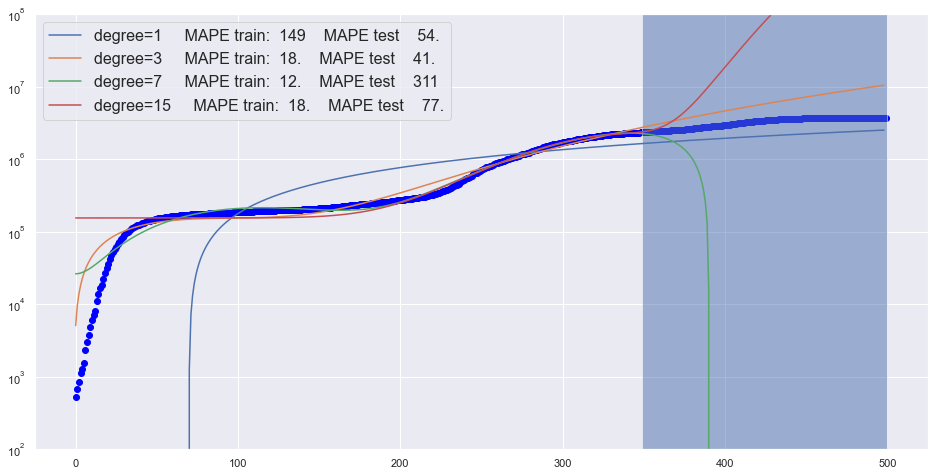

In [95]:
fig, ax1 = plt.subplots(1, 1)

ax1.scatter(np.arange(len(y)),y, color='blue')
ax1.axvspan((len(y)-test_points-1), len(y), facecolor='b', alpha=0.5)

for degree in [1,3,7,15]:
    y_hat_insaple=PolynomialRegression(degree).fit(X_train, y_train).predict(X_train) #preditction on train data
    y_hat_test = PolynomialRegression(degree).fit(X_train, y_train).predict(X_test) #preditction on test data



    X_plot=np.concatenate((X_train, X_test), axis=None) #concatenating both test and train data
    y_plot=np.concatenate((y_hat_insaple, y_hat_test), axis=None) #concatenating both test and train data

    ax1.plot(X_plot, y_plot, label='degree={0}'.format(degree)+ 
                 '     MAPE train:  ' + str(mean_absolute_percentage_error(y_hat_insaple, y_train))[0:3]
                 +'    MAPE test    ' +str(mean_absolute_percentage_error(y_hat_test, y_test))[0:3]) 

ax1.set_ylim(100, 100000000)
ax1.set_yscale('log')
ax1.legend(loc='best',
           prop={'size': 16});

#MAPE = mean absolute percentage error